<a href="https://colab.research.google.com/github/yc-chen10/113-1-finance/blob/main/week3%E4%BD%9C%E6%A5%AD_%E6%8A%80%E8%A1%93%E5%88%86%E6%9E%90%E8%88%87K%E7%B7%9A%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

####抓股票資料（一年）

In [85]:
# "一詮"股票代號
stock_id = '2486'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = yyyymmdd

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240923&stockNo=2486
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20240930


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"47,059,599","4,825,879,416",95.60,104.50,95.60,103.00,+8.00,"22,403"
1,113/09/03,"31,956,910","3,192,762,998",103.50,104.00,97.80,98.00,-5.00,"20,927"
2,113/09/04,"18,582,532","1,737,234,498",92.80,96.50,89.60,91.60,-6.40,"11,996"
3,113/09/05,"23,664,939","2,134,003,056",93.30,94.30,88.00,88.00,-3.60,"15,902"
4,113/09/06,"23,510,562","2,115,888,012",89.10,92.50,87.90,87.90,-0.10,"14,900"
5,113/09/09,"9,534,290","823,986,447",84.20,88.70,84.10,87.20,-0.70,"7,813"
6,113/09/10,"11,633,181","997,527,266",88.50,89.50,83.20,85.20,-2.00,"8,308"
7,113/09/11,"8,240,892","704,237,530",86.70,86.80,84.60,85.60,+0.40,"5,273"
8,113/09/12,"14,215,811","1,291,107,848",87.40,92.50,87.30,90.50,+4.90,"10,449"
9,113/09/13,"7,197,465","651,029,173",90.70,91.70,89.30,90.60,+0.10,"6,985"


In [86]:
def get_stock_data(stock_no, year, month):
    # 將日期格式化為 'yyyymmdd'，並指定為該月份的第一天
    date = f"{year}{str(month).zfill(2)}01"
    url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}"

    # 發送HTTP請求並獲取響應
    response = requests.get(url)
    if response.status_code == 200:
        # 將結果轉換為JSON
        data = response.json()
        if data['stat'] == 'OK':
            # 返回數據中的每日交易資料
            return pd.DataFrame(data['data'], columns=data['fields'])
        else:
            print(f"No data for {year}-{month}")
            return None
    else:
        print(f"Failed to fetch data for {year}-{month}")
        return None


In [87]:
def get_multiple_months(stock_no, start_year, start_month, end_year, end_month):
    all_data = []

    # 循環通過年份和月份來調用API
    current_year = start_year
    current_month = start_month

    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        # 獲取單月的股票資料
        monthly_data = get_stock_data(stock_no, current_year, current_month)
        if monthly_data is not None:
            all_data.append(monthly_data)

        # 更新到下一個月份
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1

    # 合併所有月份的數據
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None


In [88]:
stock_no = '2486'
start_year = 2023
start_month = 9
end_year = 2024
end_month = 9

stock_data = get_multiple_months(stock_no, start_year, start_month, end_year, end_month)

# 打印股票資料
if stock_data is not None:
    print(stock_data)


            日期        成交股數           成交金額     開盤價     最高價    最低價     收盤價  \
0    112/09/01   3,868,792    160,002,813   41.05   42.15  40.70   41.25   
1    112/09/04   3,830,653    161,436,535   41.50   42.90  41.05   42.65   
2    112/09/05  17,914,987    808,543,980   43.20   46.65  43.20   46.10   
3    112/09/06   7,963,726    367,461,917   46.00   46.95  45.60   46.05   
4    112/09/07  39,925,836  1,936,272,799   48.10   49.70  45.70   48.85   
..         ...         ...            ...     ...     ...    ...     ...   
257  113/09/23   6,383,750    607,796,196   95.20   96.50  94.20   94.20   
258  113/09/24   8,628,849    821,923,069   94.20   97.30  93.30   94.60   
259  113/09/25   6,529,733    622,251,538   95.60   96.30  94.60   94.90   
260  113/09/26  29,060,361  2,930,693,598   95.80  103.50  95.10  100.50   
261  113/09/27  29,915,593  3,070,955,106  101.00  106.00  99.90  100.00   

      漲跌價差    成交筆數  
0    -0.05   2,155  
1    +1.40   2,311  
2    +3.45  10,074  
3  

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      19 non-null     object
 1   成交股數    19 non-null     object
 2   成交金額    19 non-null     object
 3   開盤價     19 non-null     object
 4   最高價     19 non-null     object
 5   最低價     19 non-null     object
 6   收盤價     19 non-null     object
 7   漲跌價差    19 non-null     object
 8   成交筆數    19 non-null     object
dtypes: object(9)
memory usage: 1.5+ KB


In [90]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      262 non-null    object
 1   成交股數    262 non-null    object
 2   成交金額    262 non-null    object
 3   開盤價     262 non-null    object
 4   最高價     262 non-null    object
 5   最低價     262 non-null    object
 6   收盤價     262 non-null    object
 7   漲跌價差    262 non-null    object
 8   成交筆數    262 non-null    object
dtypes: object(9)
memory usage: 18.5+ KB


#### 時間格式轉換def

In [91]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
stock_data['日期'] = stock_data['日期'].apply(convert_minguo_to_ad)

In [92]:
# 轉換為 pandas 中的 datetime 格式
stock_data['日期'] = pd.to_datetime(stock_data['日期'], format='%Y/%m/%d')

In [93]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
1,2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2,2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
3,2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
4,2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"


#### 轉數字 numeric

In [94]:
#確保stock_data 轉成數字
stock_data['收盤價'] = stock_data['收盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['開盤價'] = stock_data['開盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['最高價'] = stock_data['最高價'].apply(pd.to_numeric, errors='coerce')
stock_data['最低價'] = stock_data['最低價'].apply(pd.to_numeric, errors='coerce')

In [95]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
1,2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2,2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
3,2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
4,2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"


In [96]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      262 non-null    datetime64[ns]
 1   成交股數    262 non-null    object        
 2   成交金額    262 non-null    object        
 3   開盤價     262 non-null    float64       
 4   最高價     262 non-null    float64       
 5   最低價     262 non-null    float64       
 6   收盤價     262 non-null    float64       
 7   漲跌價差    262 non-null    object        
 8   成交筆數    262 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 18.5+ KB


#### 開始計算指標、可視化

In [97]:
!pip install mplfinance

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [99]:
stock_data.set_index('日期', inplace=True)  # 設定 '日期' 列為索引

In [100]:
# 修改SMA（簡單移動平均線）的窗口
stock_data['SMA_10'] = stock_data['收盤價'].rolling(window=10).mean()  # 設定窗口為10天
stock_data['SMA_20'] = stock_data['收盤價'].rolling(window=20).mean()  # 設定窗口為20天

# 修改EMA（指數移動平均線）的窗口
stock_data['EMA_10'] = stock_data['收盤價'].ewm(span=10, adjust=False).mean()  # 設定窗口為10天
stock_data['EMA_20'] = stock_data['收盤價'].ewm(span=20, adjust=False).mean()  # 設定窗口為20天

In [101]:
def calculate_RSI(df, window):
    delta = df['收盤價'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 設定不同的RSI窗口
stock_data['RSI_14'] = calculate_RSI(stock_data, window=14)  # 14天窗口
stock_data['RSI_7'] = calculate_RSI(stock_data, window=7)    # 7天窗口

In [103]:
def calculate_MACD(df, short_window, long_window, signal_window):
    short_ema = df['收盤價'].ewm(span=short_window, adjust=False).mean()  # 短期EMA
    long_ema = df['收盤價'].ewm(span=long_window, adjust=False).mean()    # 長期EMA
    macd = short_ema - long_ema                                          # MACD線
    signal = macd.ewm(span=signal_window, adjust=False).mean()           # 信號線
    return macd, signal

# 設定MACD的窗口
stock_data['MACD'], stock_data['Signal_Line'] = calculate_MACD(stock_data, short_window=12, long_window=26, signal_window=9)

# 如果你想使用不同的窗口，比如短期9天、長期21天、信號6天
stock_data['MACD_9_21'], stock_data['Signal_6'] = calculate_MACD(stock_data, short_window=9, long_window=21, signal_window=6)

In [104]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2023-09-01 to 2024-09-27
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   成交股數         262 non-null    object 
 1   成交金額         262 non-null    object 
 2   開盤價          262 non-null    float64
 3   最高價          262 non-null    float64
 4   最低價          262 non-null    float64
 5   收盤價          262 non-null    float64
 6   漲跌價差         262 non-null    object 
 7   成交筆數         262 non-null    object 
 8   SMA_10       253 non-null    float64
 9   SMA_20       243 non-null    float64
 10  EMA_10       262 non-null    float64
 11  EMA_20       262 non-null    float64
 12  RSI_14       249 non-null    float64
 13  RSI_7        256 non-null    float64
 14  MACD         262 non-null    float64
 15  Signal_Line  262 non-null    float64
 16  MACD_9_21    262 non-null    float64
 17  Signal_6     262 non-null    float64
dtypes: float64(14), object(4)
memor

In [105]:
stock_data.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,SMA_10,SMA_20,EMA_10,EMA_20,RSI_14,RSI_7,MACD,Signal_Line,MACD_9_21,Signal_6
日期,,,,,,,,,,,,,,,,,,
2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155",NaN,NaN,41.250000,41.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311",NaN,NaN,41.504545,41.383333,NaN,NaN,0.111681,0.022336,0.152727,0.043636
2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074",NaN,NaN,42.340083,41.832540,NaN,NaN,0.473121,0.112493,0.637388,0.213280
2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466",NaN,NaN,43.014613,42.234203,NaN,NaN,0.746921,0.239379,0.972826,0.430293
2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963",NaN,NaN,44.075593,42.864279,NaN,NaN,1.176286,0.426760,1.504547,0.737223


In [106]:
stock_data['Close'] = stock_data['收盤價']
stock_data['Open'] = stock_data['開盤價']
stock_data['High'] = stock_data['最高價']
stock_data['Low'] = stock_data['最低價']
# 去掉 '成交股數' 列中的逗號，然後將其轉換為 float
stock_data['Volume'] = stock_data['成交股數'].str.replace(',', '').astype(float)
stock_data[]

<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.tight_layout()
<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  plt.tight_layout()
<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  plt.tight_layout()
<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  plt.tight_layout()
<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from current font.
  plt.tight_layout()
<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  plt.tight_layout()
<ipython-input-109-0624be2d82f6>:40: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from current font.
  plt.tight_layout()

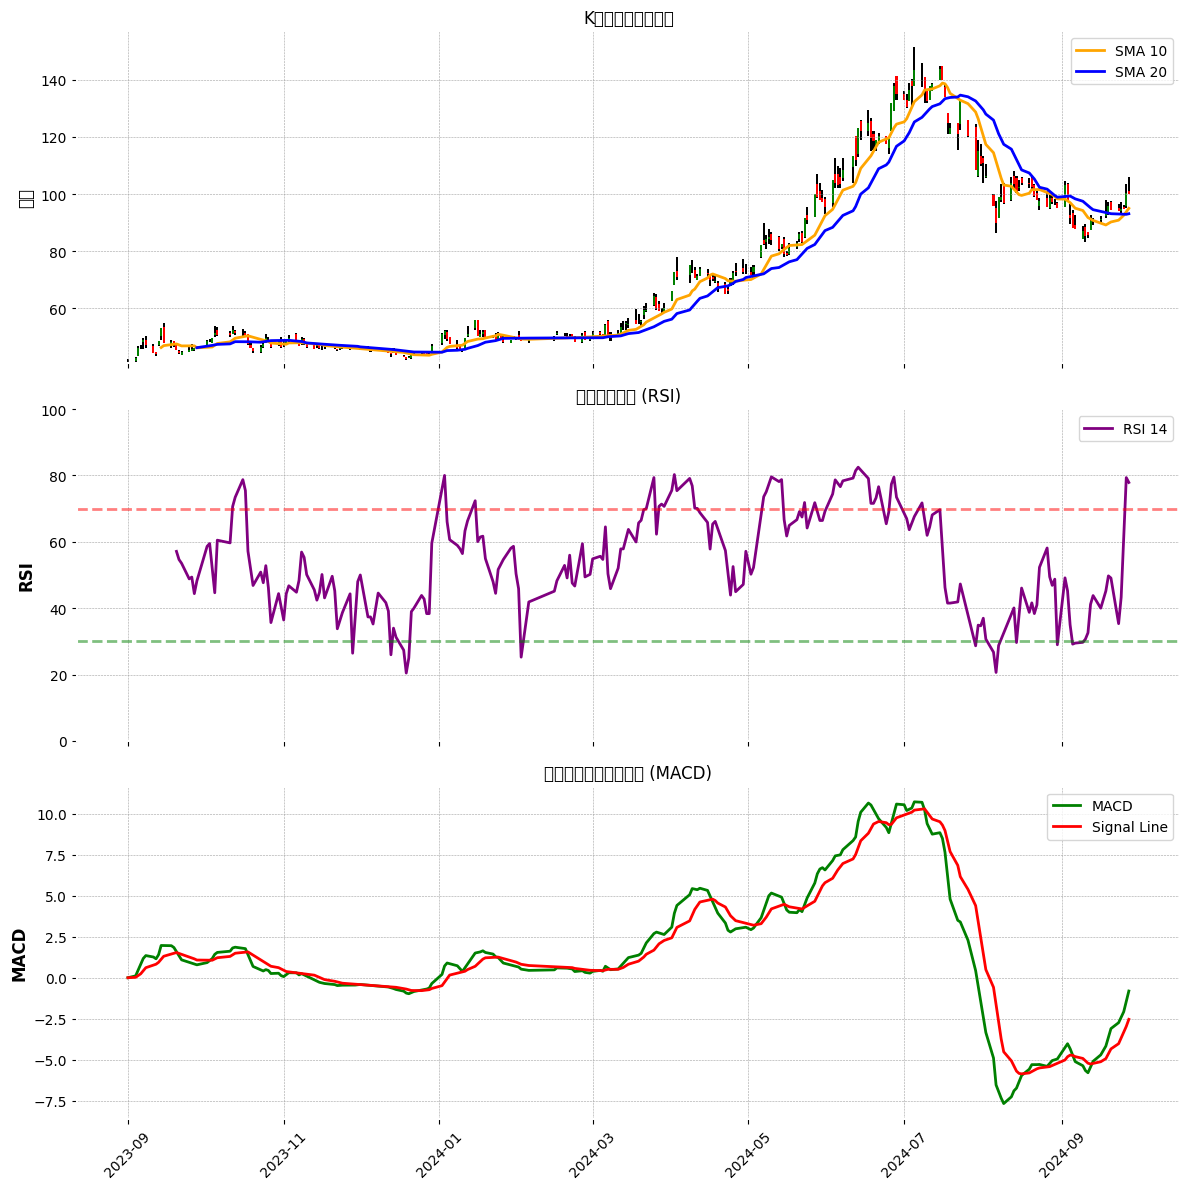

In [109]:
# 設置畫布
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# 繪製 K 線圖
def plot_candlestick(ax):
    for i in range(len(stock_data)):
        color = 'green' if stock_data['Close'].iloc[i] >= stock_data['Open'].iloc[i] else 'red'
        ax.bar(stock_data.index[i], stock_data['Close'].iloc[i] - stock_data['Open'].iloc[i], bottom=stock_data['Open'].iloc[i], color=color)
        ax.bar(stock_data.index[i], stock_data['High'].iloc[i] - max(stock_data['Open'].iloc[i], stock_data['Close'].iloc[i]),
               bottom=max(stock_data['Open'].iloc[i], stock_data['Close'].iloc[i]), color='black')
        ax.bar(stock_data.index[i], min(stock_data['Open'].iloc[i], stock_data['Close'].iloc[i]) - stock_data['Low'].iloc[i],
               bottom=stock_data['Low'].iloc[i], color='black')

# 繪製 K 線圖
plot_candlestick(ax1)
ax1.plot(stock_data.index, stock_data['SMA_10'], label='SMA 10', color='orange')
ax1.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20', color='blue')
ax1.set_title('K線圖與移動平均線')
ax1.set_ylabel('價格')
ax1.legend()

# 繪製 RSI
ax2.plot(stock_data.index, stock_data['RSI_14'], label='RSI 14', color='purple')
ax2.axhline(70, linestyle='--', color='red', alpha=0.5)
ax2.axhline(30, linestyle='--', color='green', alpha=0.5)
ax2.set_title('相對強弱指標 (RSI)')
ax2.set_ylabel('RSI')
ax2.set_ylim([0, 100])
ax2.legend()

# 繪製 MACD
ax3.plot(stock_data.index, stock_data['MACD'], label='MACD', color='green')
ax3.plot(stock_data.index, stock_data['Signal_Line'], label='Signal Line', color='red')
ax3.set_title('移動平均收斂發散指標 (MACD)')
ax3.set_ylabel('MACD')
ax3.legend()

# 調整顯示
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [112]:
# 假設 stock_data 包含已計算的技術指標
# 新增一列 'Target' 來表示明天的價格漲跌
stock_data['Target'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

# 刪除最後一行，因為其 'Target' 沒有可用的數據
stock_data.dropna(inplace=True)

# 提取特徵與標籤
features = stock_data[['SMA_10', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line']]
target = stock_data['Target']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 訓練線性回歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 訓練決策樹模型
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 訓練隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 預測
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 評估模型表現
print("Linear Regression Accuracy:", accuracy_score(y_test, np.round(lr_predictions)))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# 顯示更詳細的分類報告
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Linear Regression Accuracy: 0.5714285714285714
Decision Tree Accuracy: 0.5714285714285714
Random Forest Accuracy: 0.5918367346938775

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.48      0.60      0.53        20

    accuracy                           0.57        49
   macro avg       0.57      0.58      0.57        49
weighted avg       0.59      0.57      0.58        49


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        29
           1       0.50      0.55      0.52        20

    accuracy                           0.59        49
   macro avg       0.58      0.59      0.58        49
weighted avg       0.60      0.59      0.59        49



優化後

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # 改用邏輯回歸，適合二元分類
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 假設 stock_data 包含已計算的技術指標
# 新增一列 'Target' 來表示明天的價格漲跌
stock_data['Target'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

# 刪除最後一行，因為其 'Target' 沒有可用的數據
stock_data.dropna(inplace=True)

# 提取特徵與標籤
features = stock_data[['SMA_10', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line']]
target = stock_data['Target']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 數據標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 優化模型的超參數
# 訓練決策樹模型
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train_scaled, y_train)

# 訓練隨機森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)

# 訓練邏輯回歸模型
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# 預測
dt_predictions = dt_grid_search.predict(X_test_scaled)
rf_predictions = rf_grid_search.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)

# 評估模型表現
print("Decision Tree Best Params:", dt_grid_search.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Decision Tree Best Params: {'max_depth': None, 'min_samples_split': 5}
Decision Tree Accuracy: 0.5918367346938775

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66        29
           1       0.50      0.50      0.50        20

    accuracy                           0.59        49
   macro avg       0.58      0.58      0.58        49
weighted avg       0.59      0.59      0.59        49

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.5918367346938775

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        29
           1       0.50      0.55      0.52        20

    accuracy                           0.59        49
   macro avg       0.58      0.59      0.58        49
weighted avg       0.60      0.59      0.59        49

Logistic Regression